In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [256]:
run_id = 'SP500_5Predictors_Horizon40'

In [257]:
os.mkdir(run_id)

In [258]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [2]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

In [3]:
predict = DataLoader('^GSPC', '2018-02-01', '2018-05-01')
predict = predict.get_adjclose()

In [4]:
predict_req, real = data_prep(predict, 20, 40) # dividing data into predictor input and real data

### Individual predictor forecasts

In [5]:
individual_predictors_forecasts = individual_predictors_pretrained_SP500_40_2(predict_req, 40)

### System disagreement between individual predictor forecasts

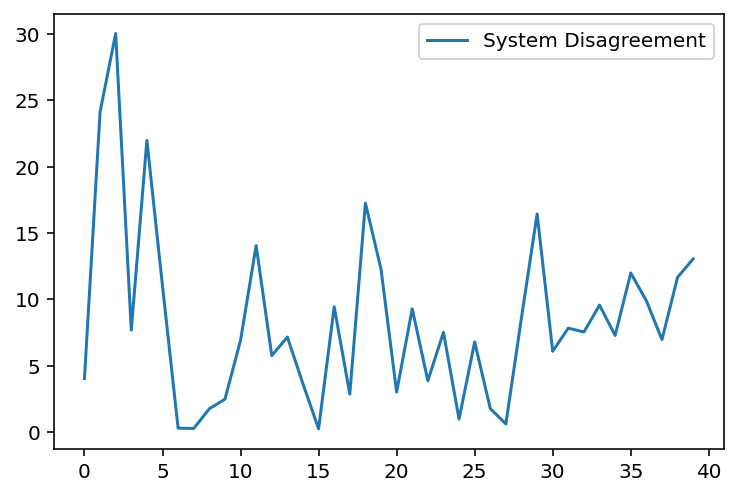

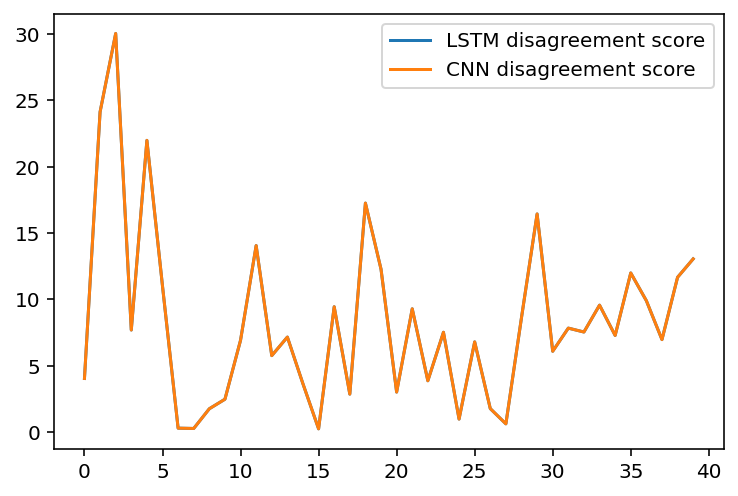

In [6]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [7]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [8]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [9]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Correcting,Correcting Memory,Real Value,LSTM,CNN,System Disagreement,LSTM disagreement score,CNN disagreement score
Date,,,,,,,,,,,,,
2018-03-02,2734.690186,2734.690186,2734.690186,2734.690186,2739.732605,2734.690186,2734.690186,2691.250000,2738.724121,2730.656250,4.033936,4.033936,4.033936
2018-03-05,2707.099365,2704.860547,2705.979956,2682.990234,2709.710022,2664.068255,2685.583810,2720.939941,2731.208496,2682.990234,24.109131,24.109131,24.109131
2018-03-06,2722.244629,2739.479651,2727.060338,2752.266602,2731.849678,2736.110913,2712.439976,2728.120117,2752.266602,2692.222656,30.021973,30.021973,30.021973
2018-03-07,2736.697632,2738.201383,2737.997956,2744.381348,2720.125609,2742.852993,2730.902457,2726.800049,2744.381348,2729.013916,7.683716,7.683716,7.683716
2018-03-08,2731.447388,2714.390185,2731.010598,2709.475586,2740.085503,2721.528780,2724.775040,2738.969971,2753.419189,2709.475586,21.971802,21.971802,21.971802
2018-03-09,2712.996216,2716.759200,2713.441302,2723.987061,2706.568071,2720.555366,2708.777135,2786.570068,2723.987061,2702.005371,10.990845,10.990845,10.990845
2018-03-12,2727.003418,2727.046964,2727.019757,2727.294922,2742.504464,2801.001890,2733.989267,2783.020020,2727.294922,2726.711914,0.291504,0.291504,0.291504
2018-03-13,2726.440186,2726.438789,2726.426852,2726.171875,2744.940854,2782.445279,2739.554730,2765.310059,2726.171875,2726.708496,0.268311,0.268311,0.268311
2018-03-14,2712.230469,2712.242574,2712.154348,2713.984131,2726.297773,2750.897611,2728.129479,2749.479980,2710.476807,2713.984131,1.753662,1.753662,1.753662


In [10]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

NameError: name 'dir_' is not defined

### Absolute error analysis of individual predictors and consensus forecasts

In [ ]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

In [ ]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

In [ ]:
correlation_ = correlation(prediction_error, True)
correlation_

In [11]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

NameError: name 'correlation_' is not defined

### MSE,  MSE log and MAE scores

,Algorithms,MSE
0,Average,8407.707795
1,NoMemory,8332.951614
2,Memory,8402.541223
3,Focus,7600.637874
4,Anchor,4305.896670
5,Correcting,1282.465919
6,Correcting Memory,4686.135303
7,LSTM,8250.314539
8,CNN,8790.858655


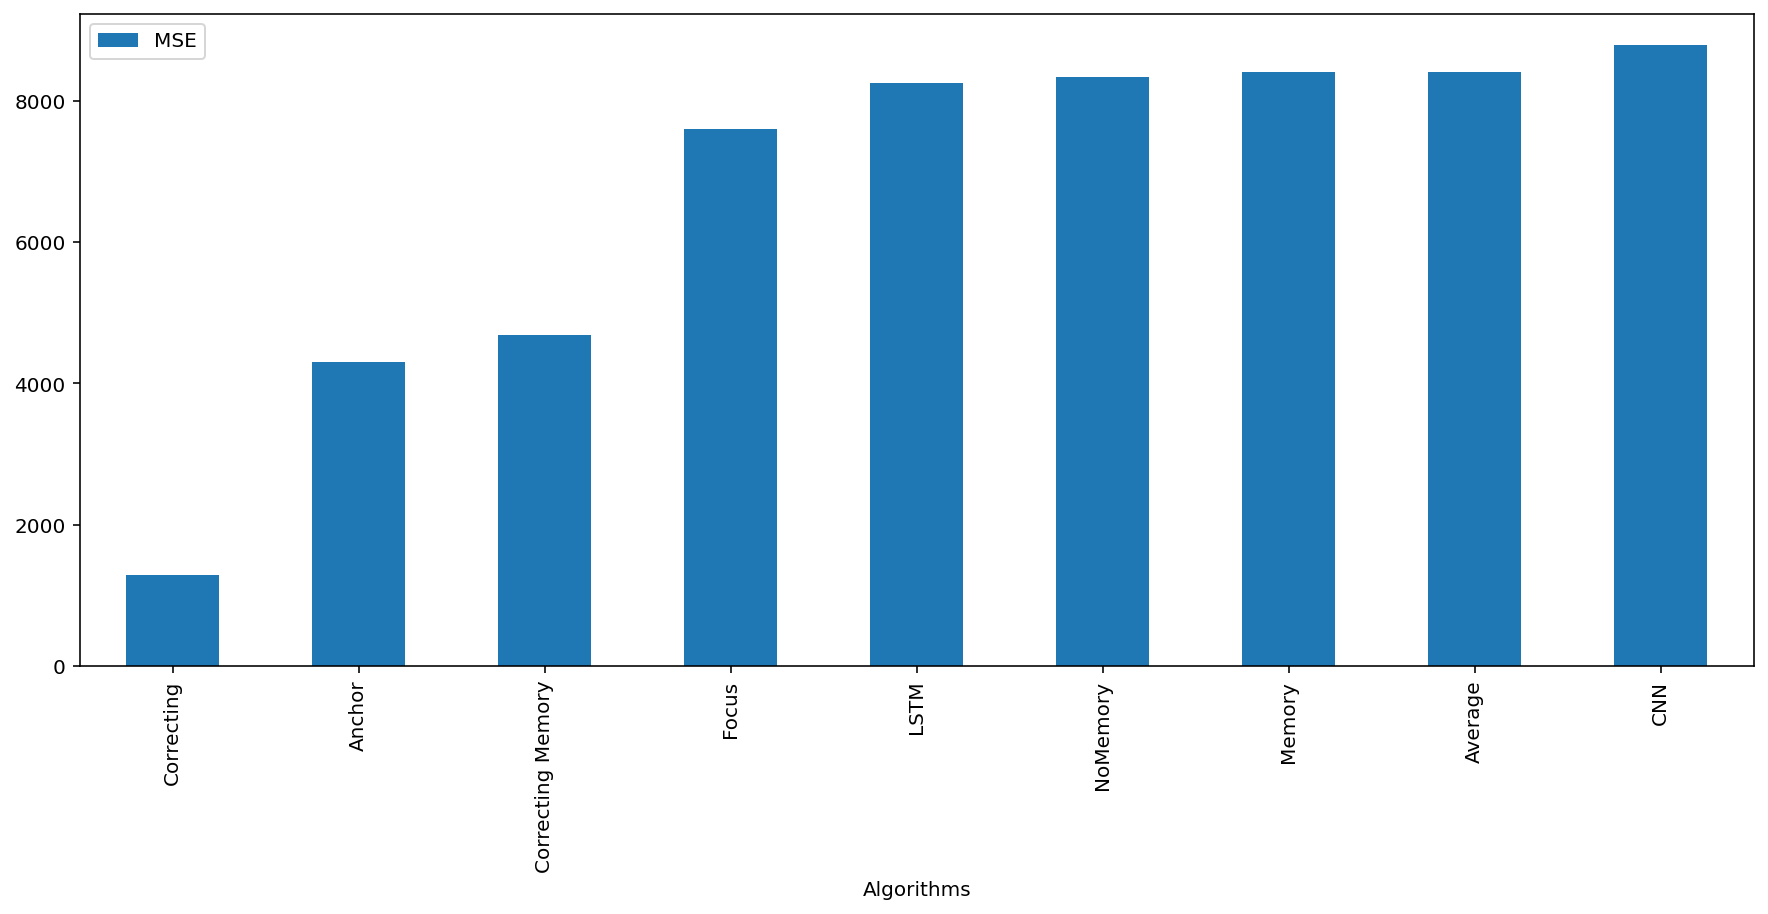

In [12]:
mse = mse_score(all_forecasts, True)
mse

In [13]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

NameError: name 'dir_' is not defined

,Algorithms,MSE Log
0,Average,0.001158
1,NoMemory,0.001148
2,Memory,0.001157
3,Focus,0.001049
4,Anchor,0.000600
5,Correcting,0.000181
6,Correcting Memory,0.000653
7,LSTM,0.001137
8,CNN,0.001208


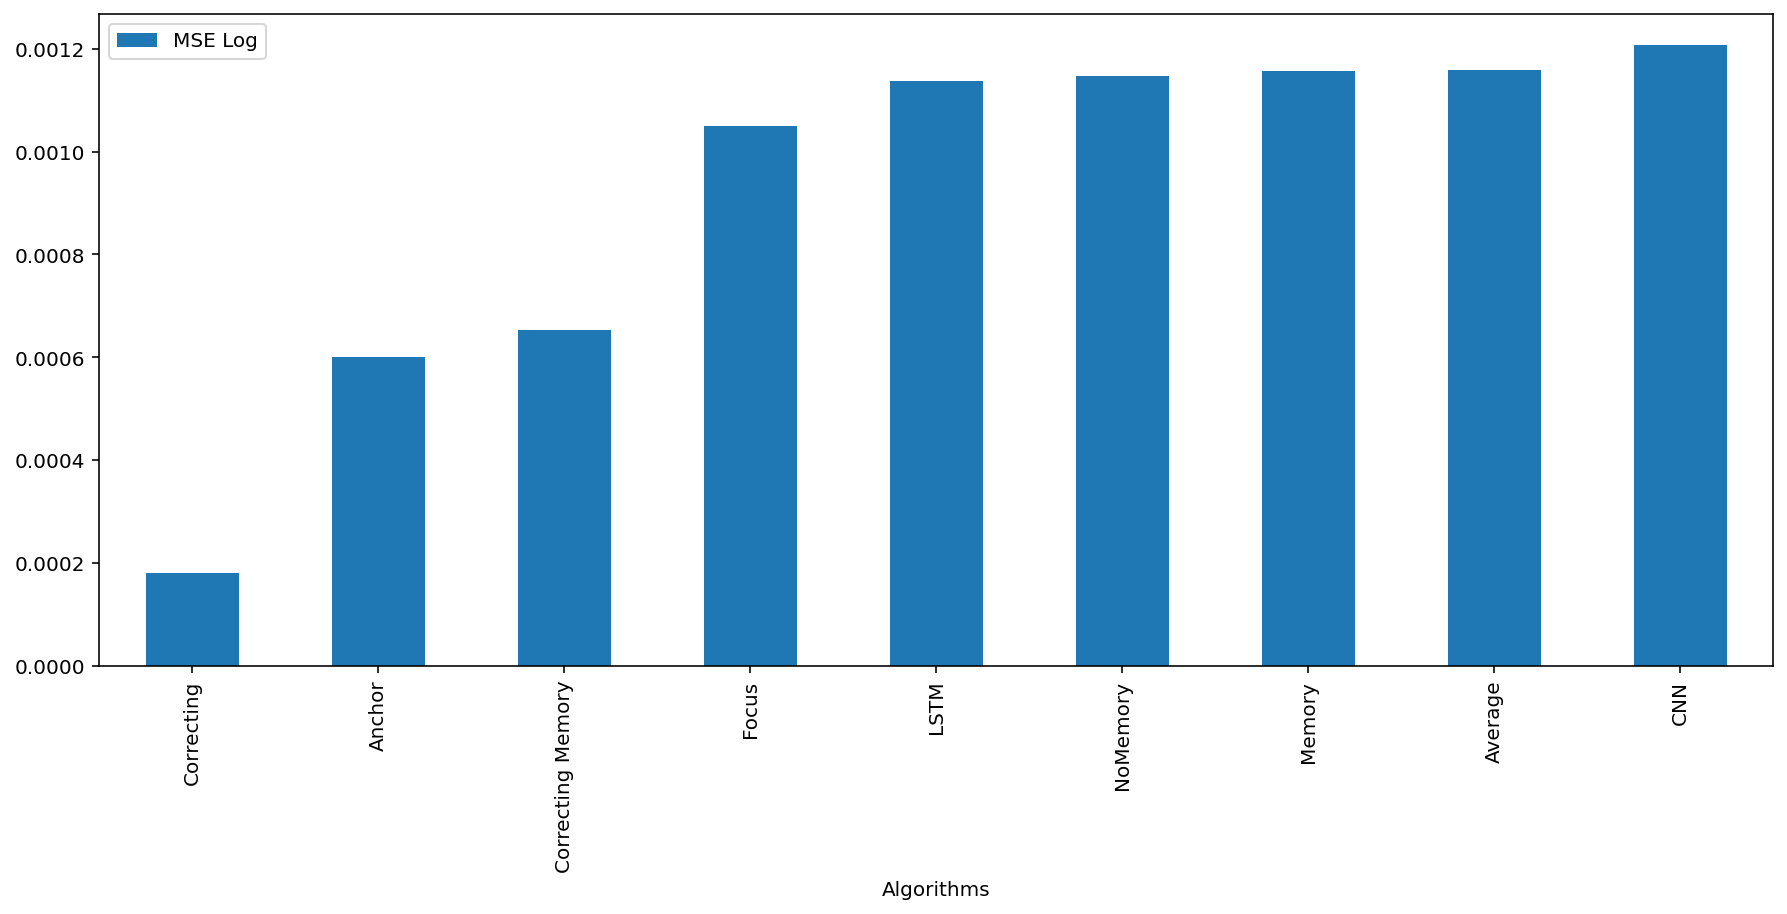

In [14]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [15]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

NameError: name 'dir_' is not defined

,Algorithms,MAE
0,Average,78.866196
1,NoMemory,78.950841
2,Memory,78.794492
3,Focus,75.873499
4,Anchor,55.124606
5,Correcting,27.823283
6,Correcting Memory,55.556468
7,LSTM,78.147498
8,CNN,82.169562


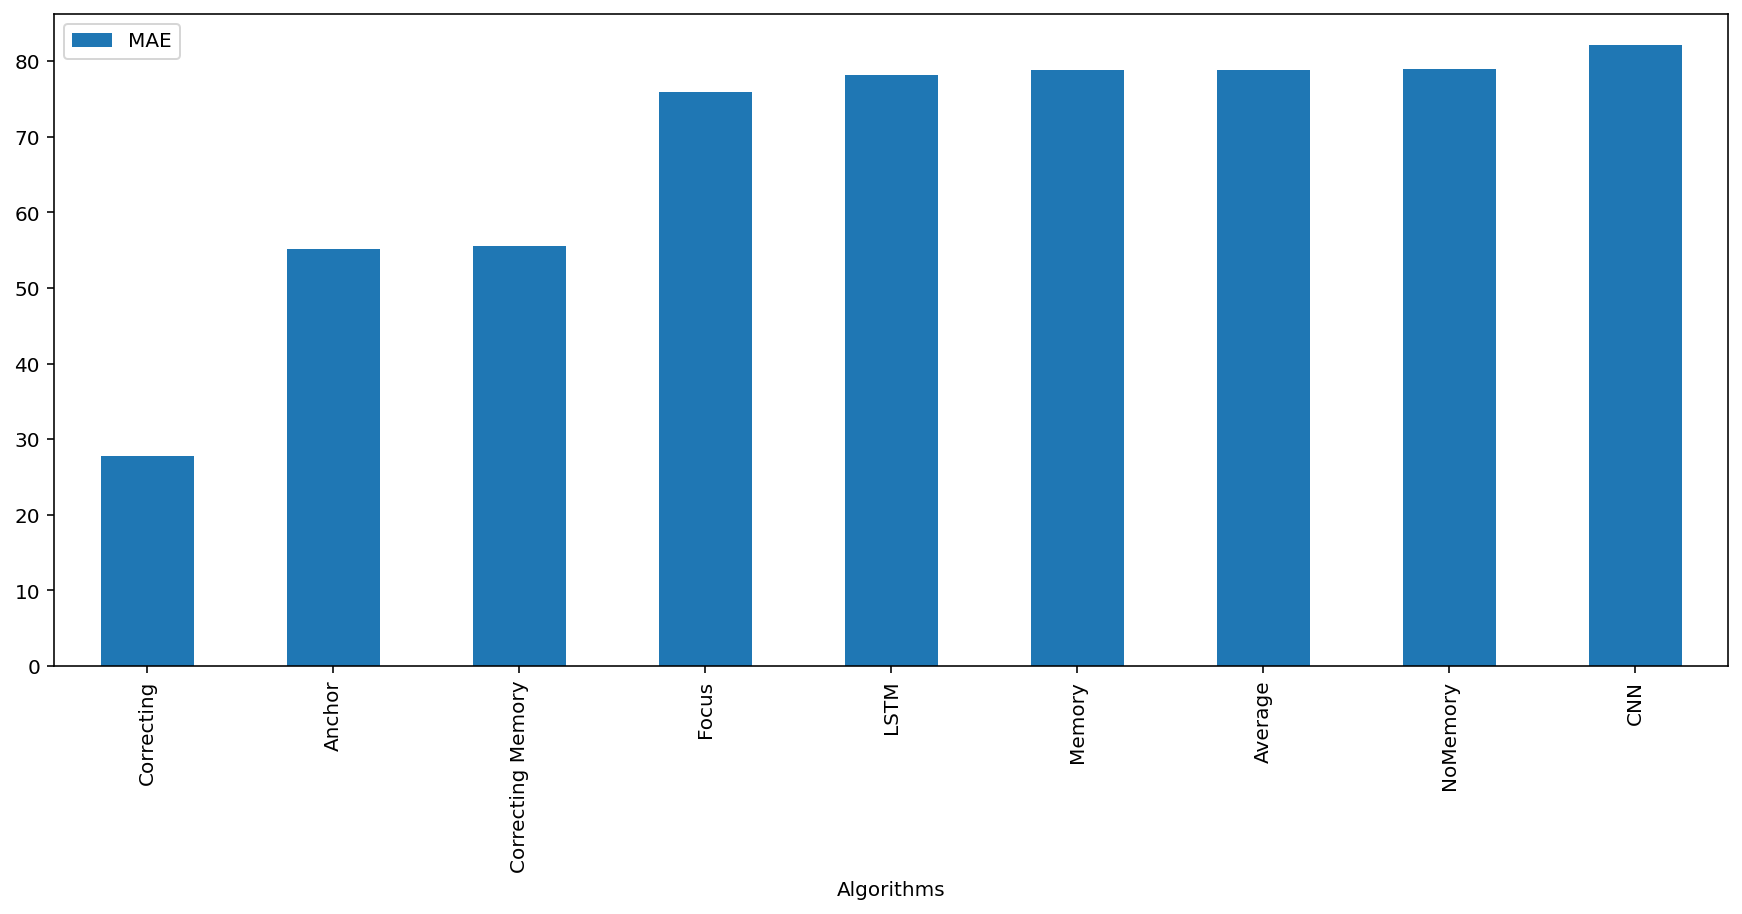

In [16]:
mae = mae_score(all_forecasts, True)
mae

In [17]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

NameError: name 'dir_' is not defined

### Performance plotting of all forecasting algorithms

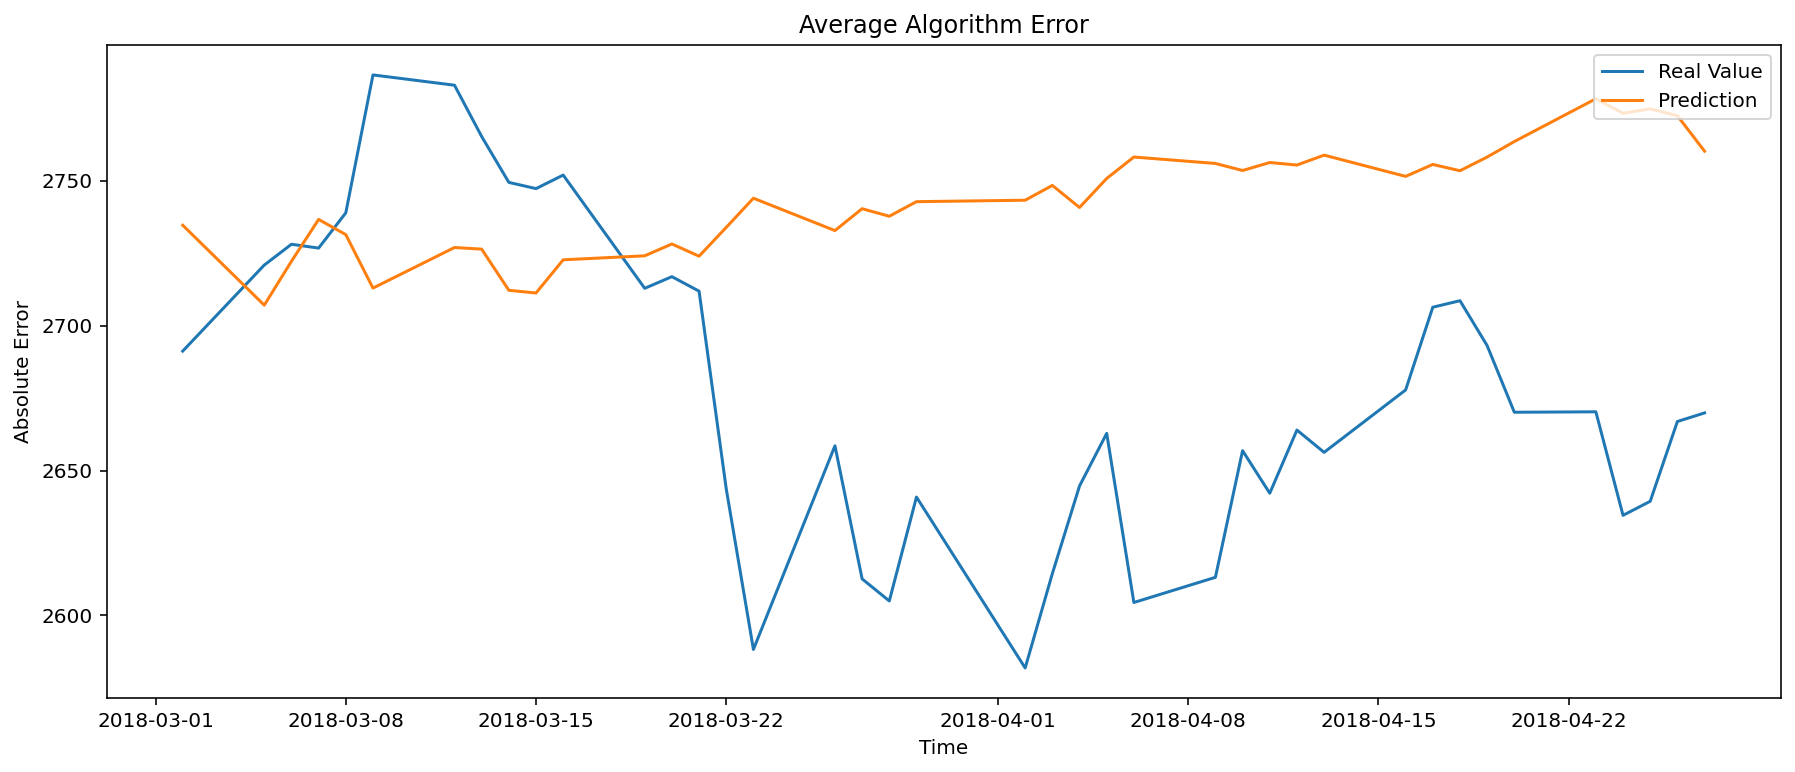

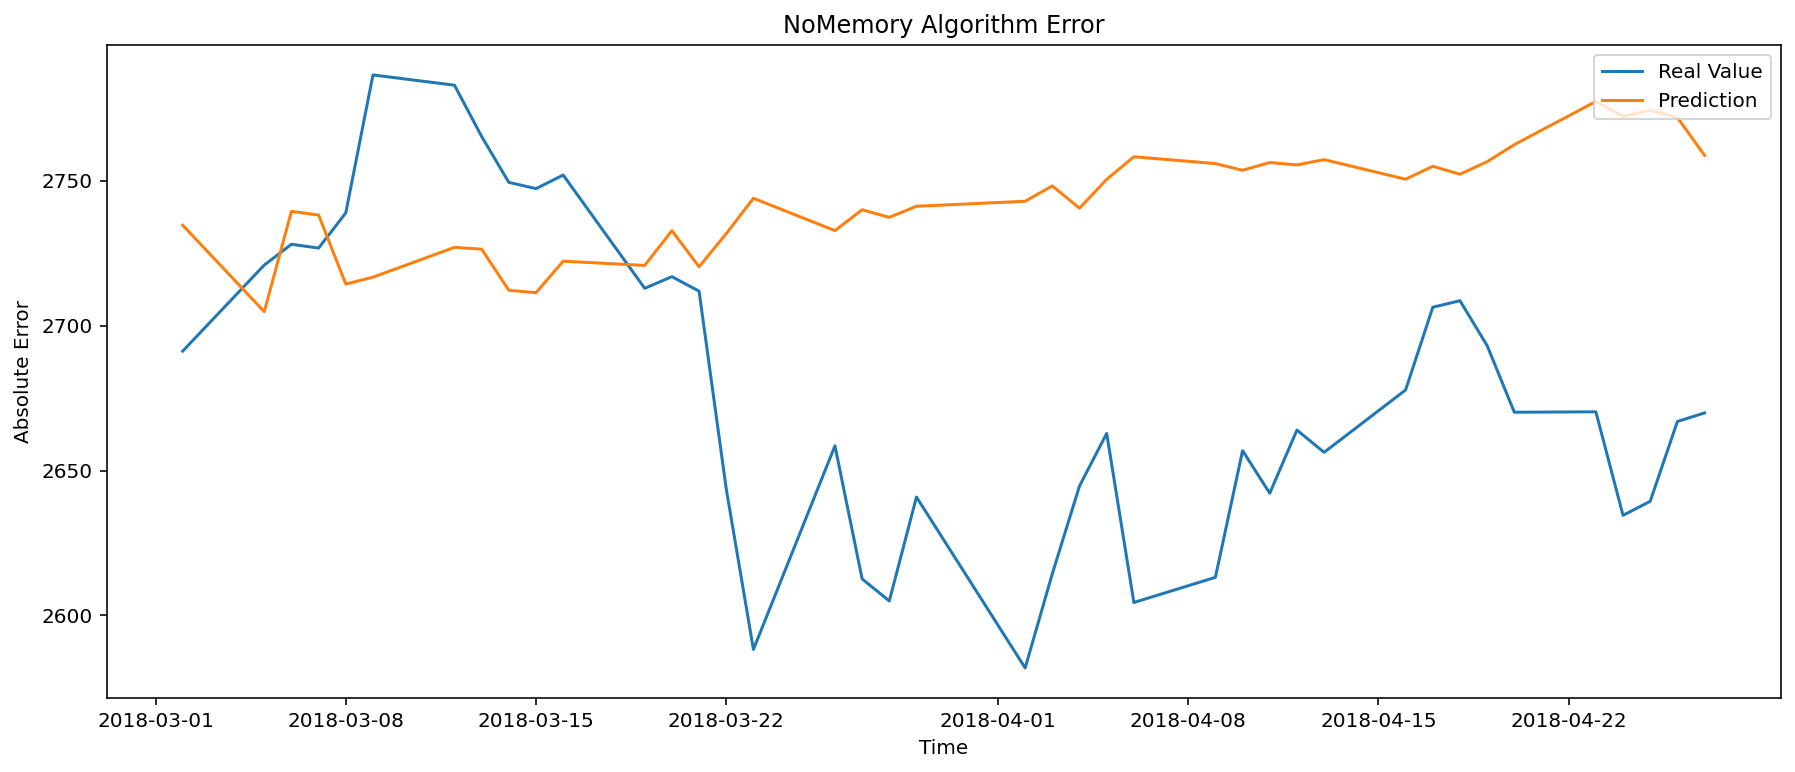

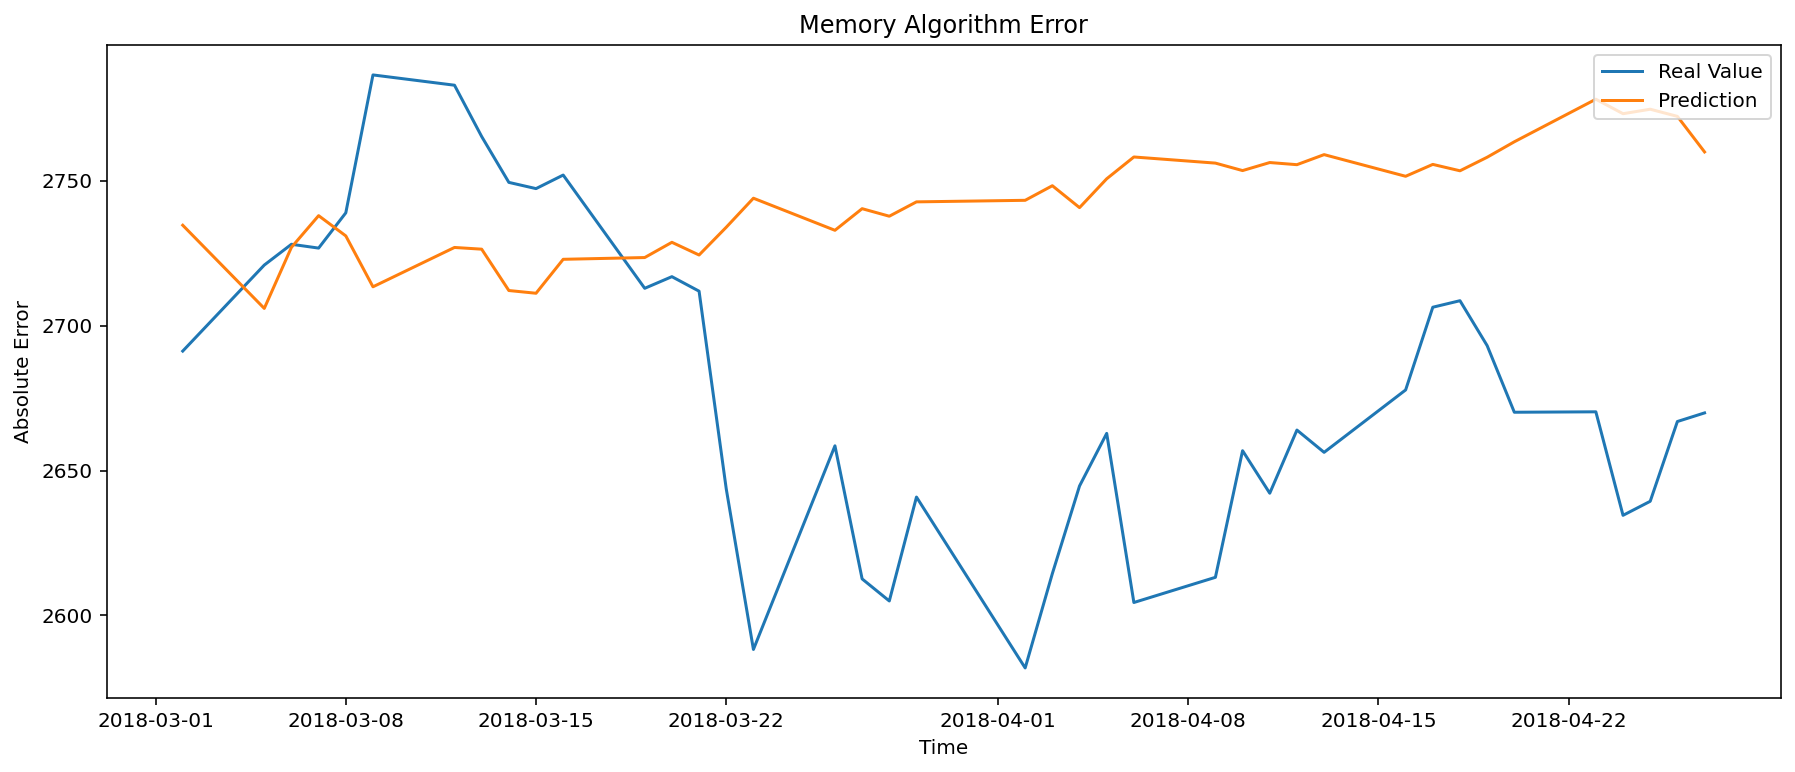

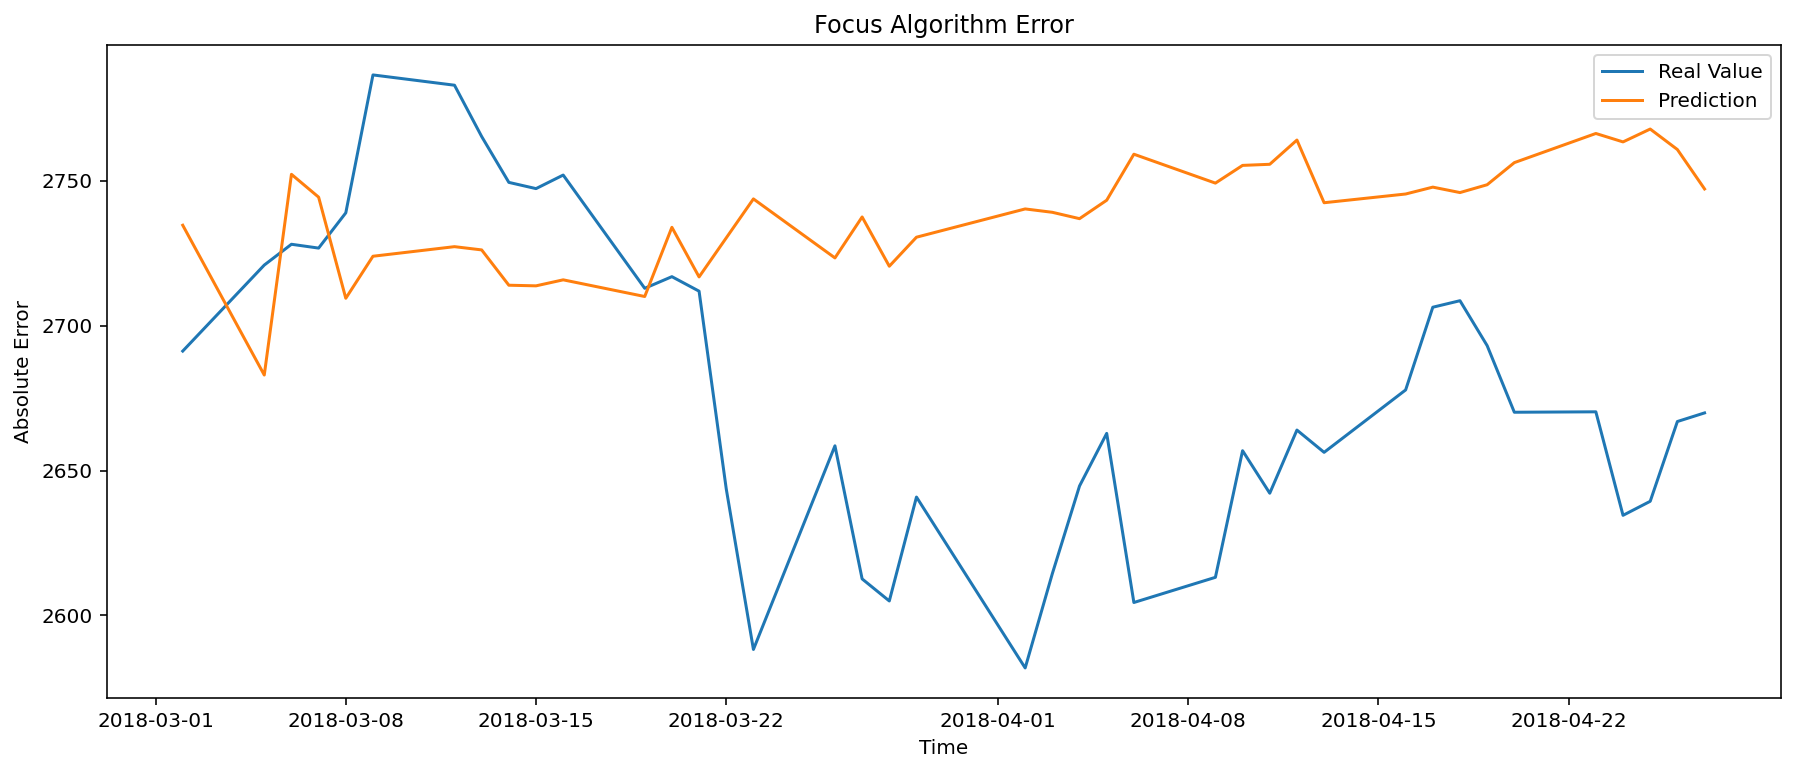

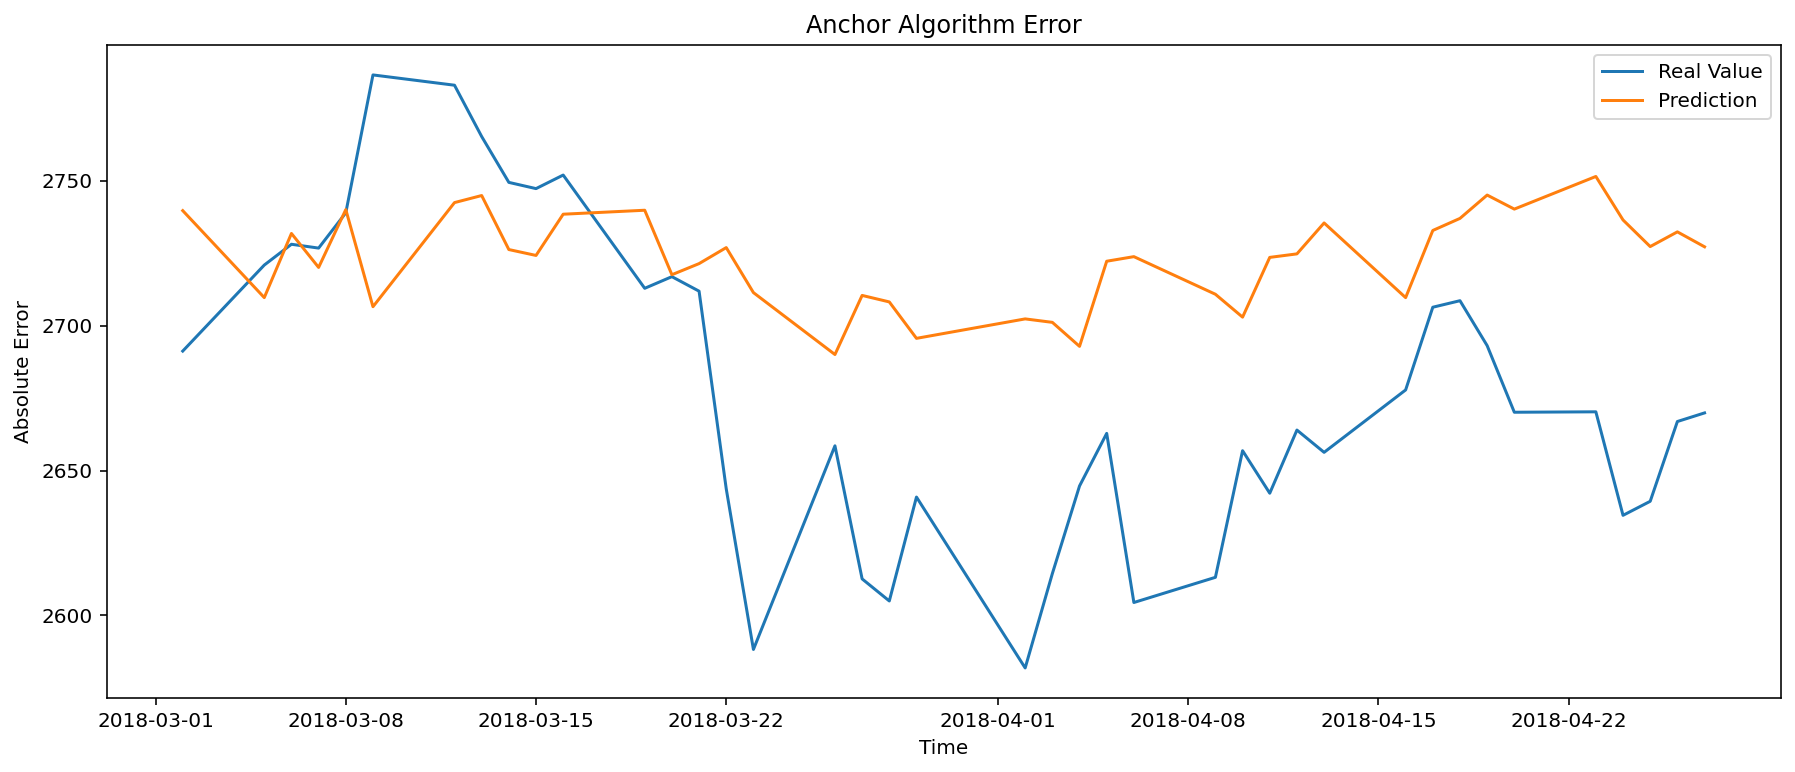

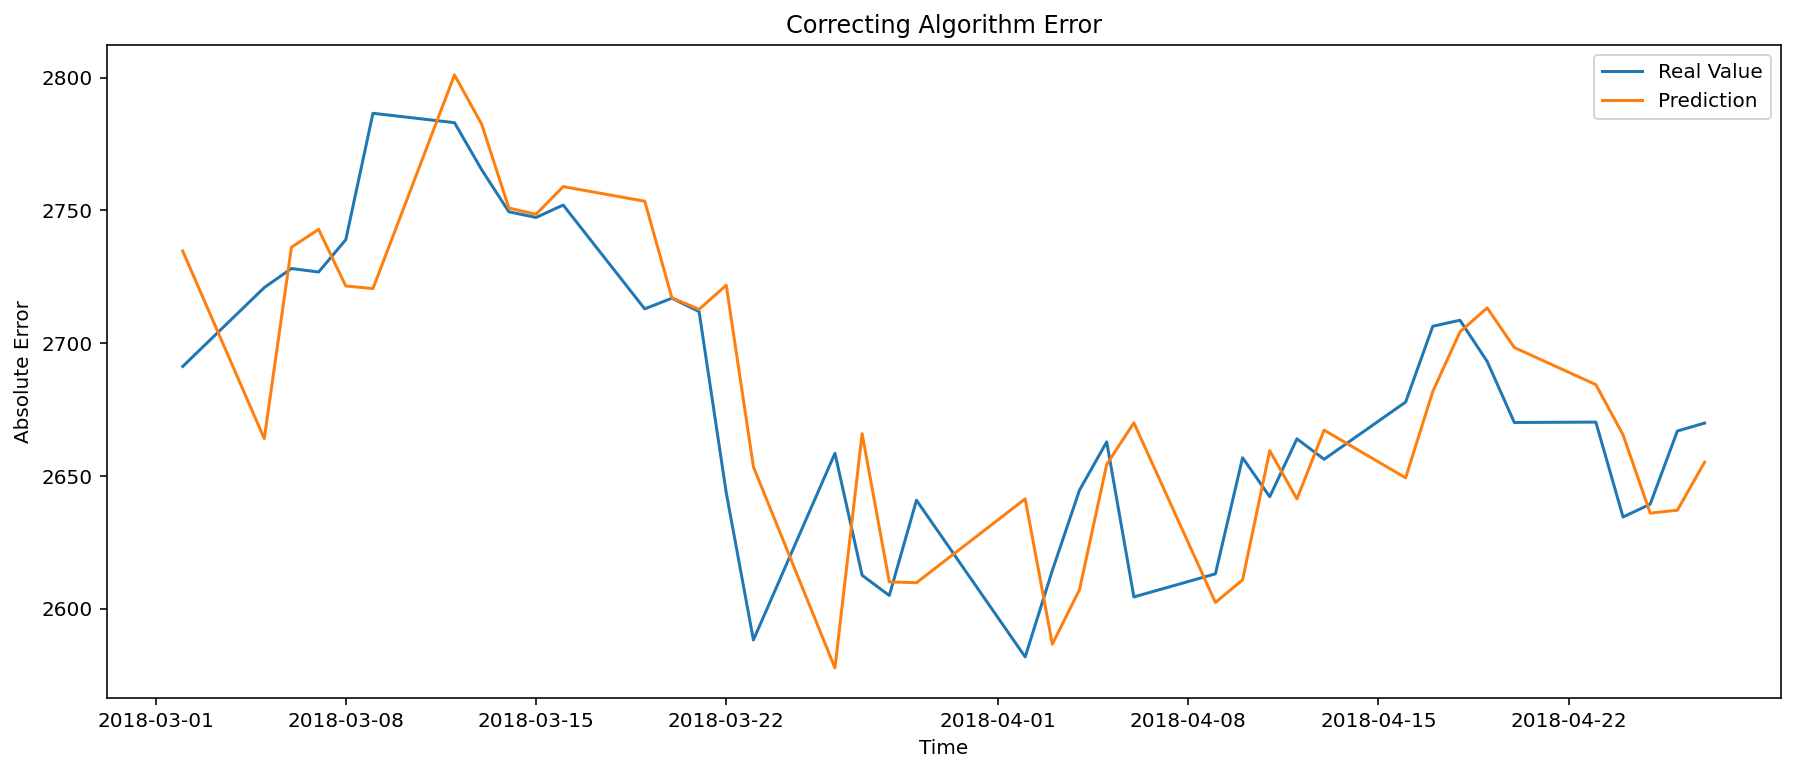

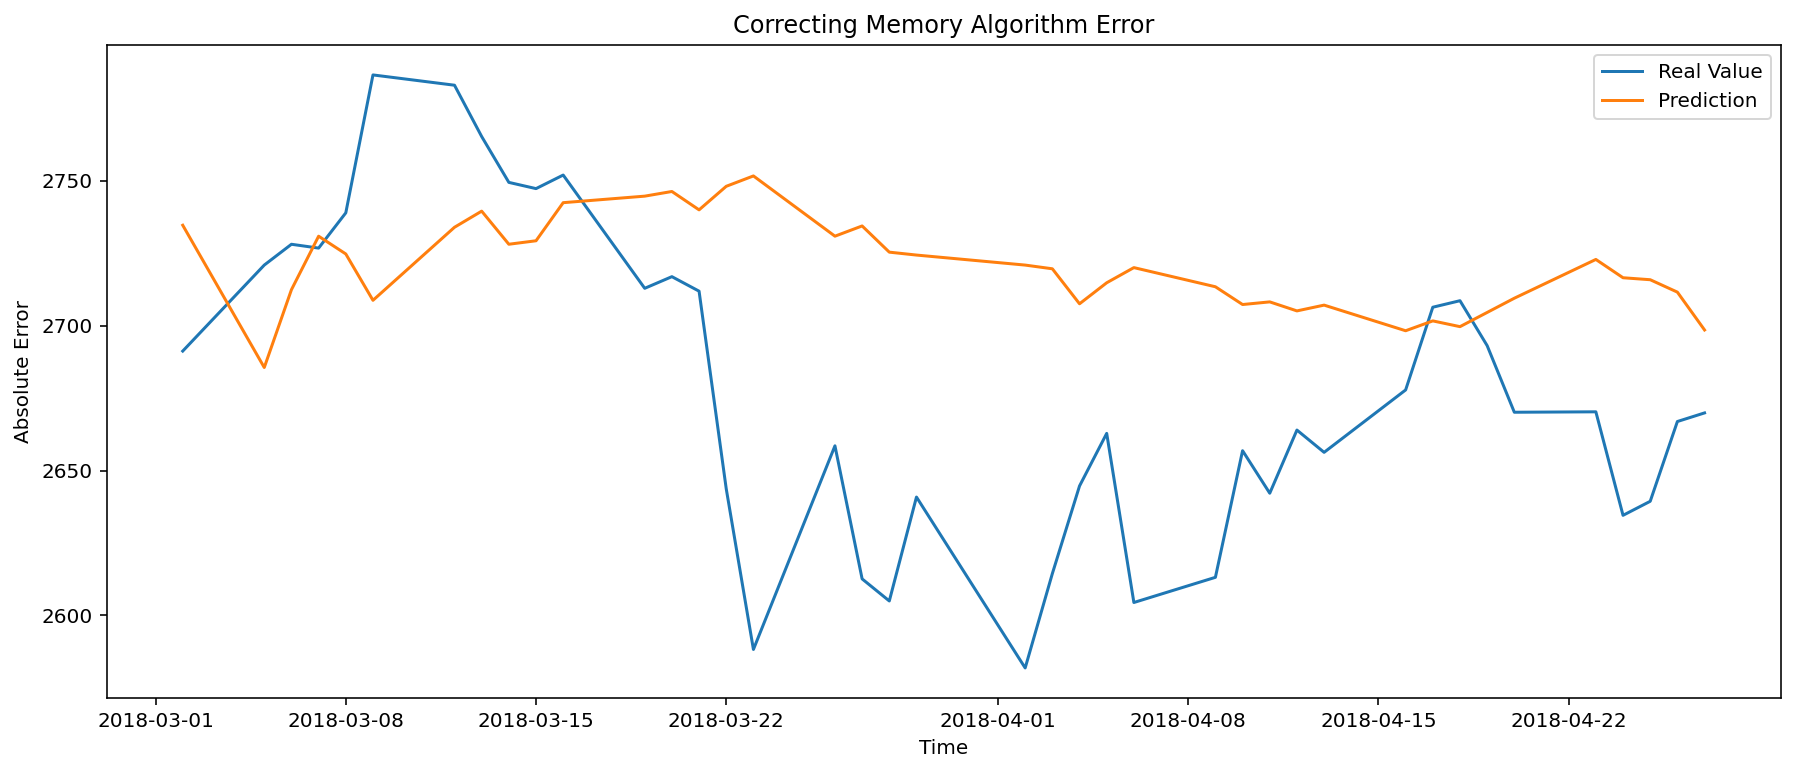

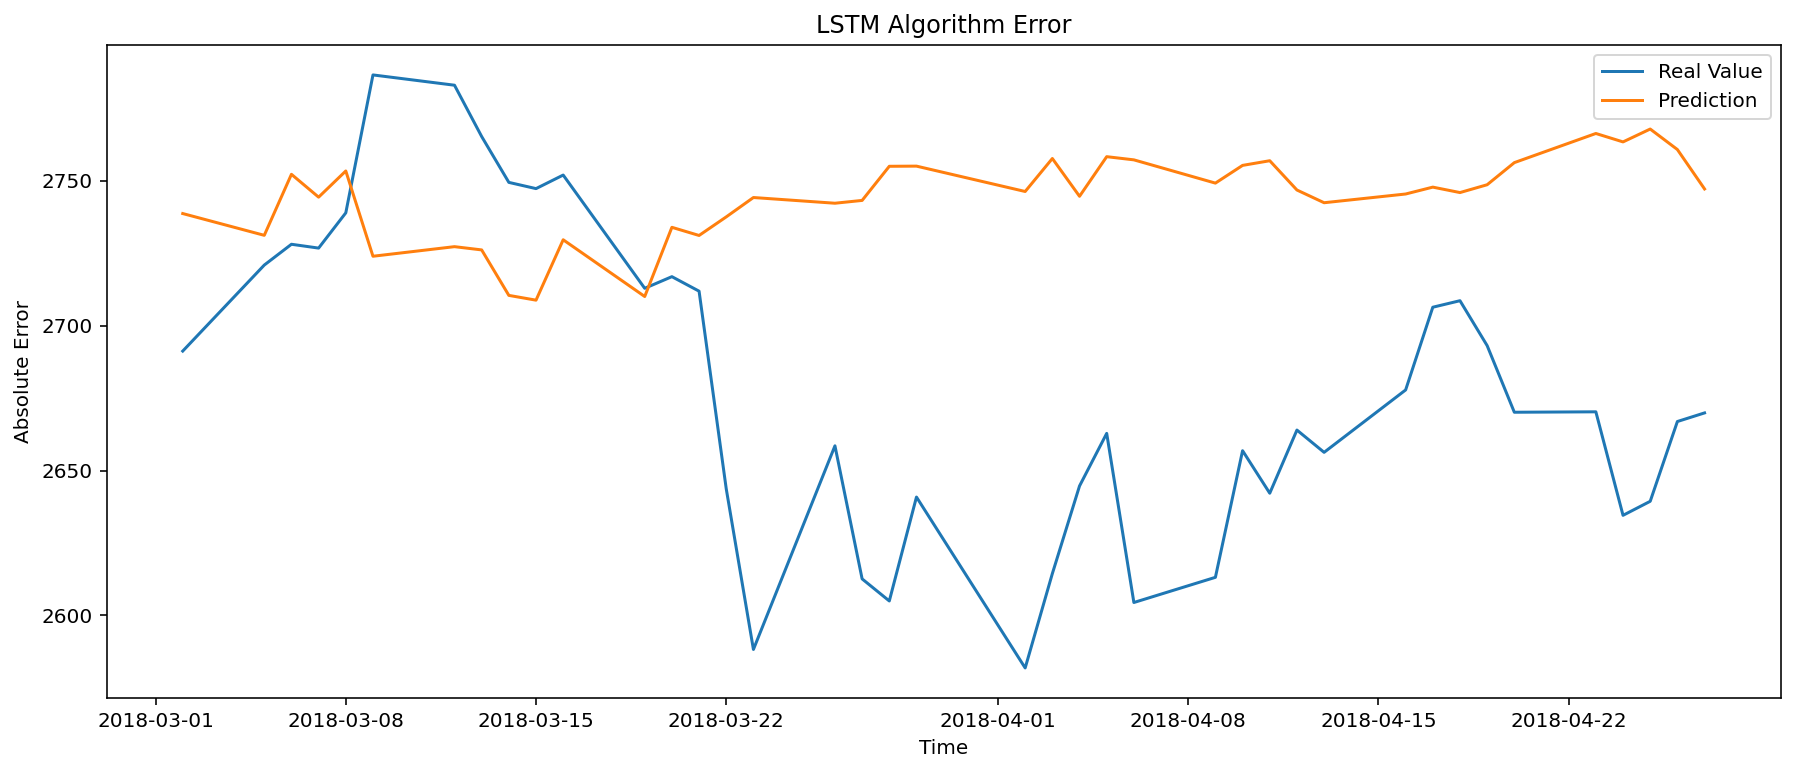

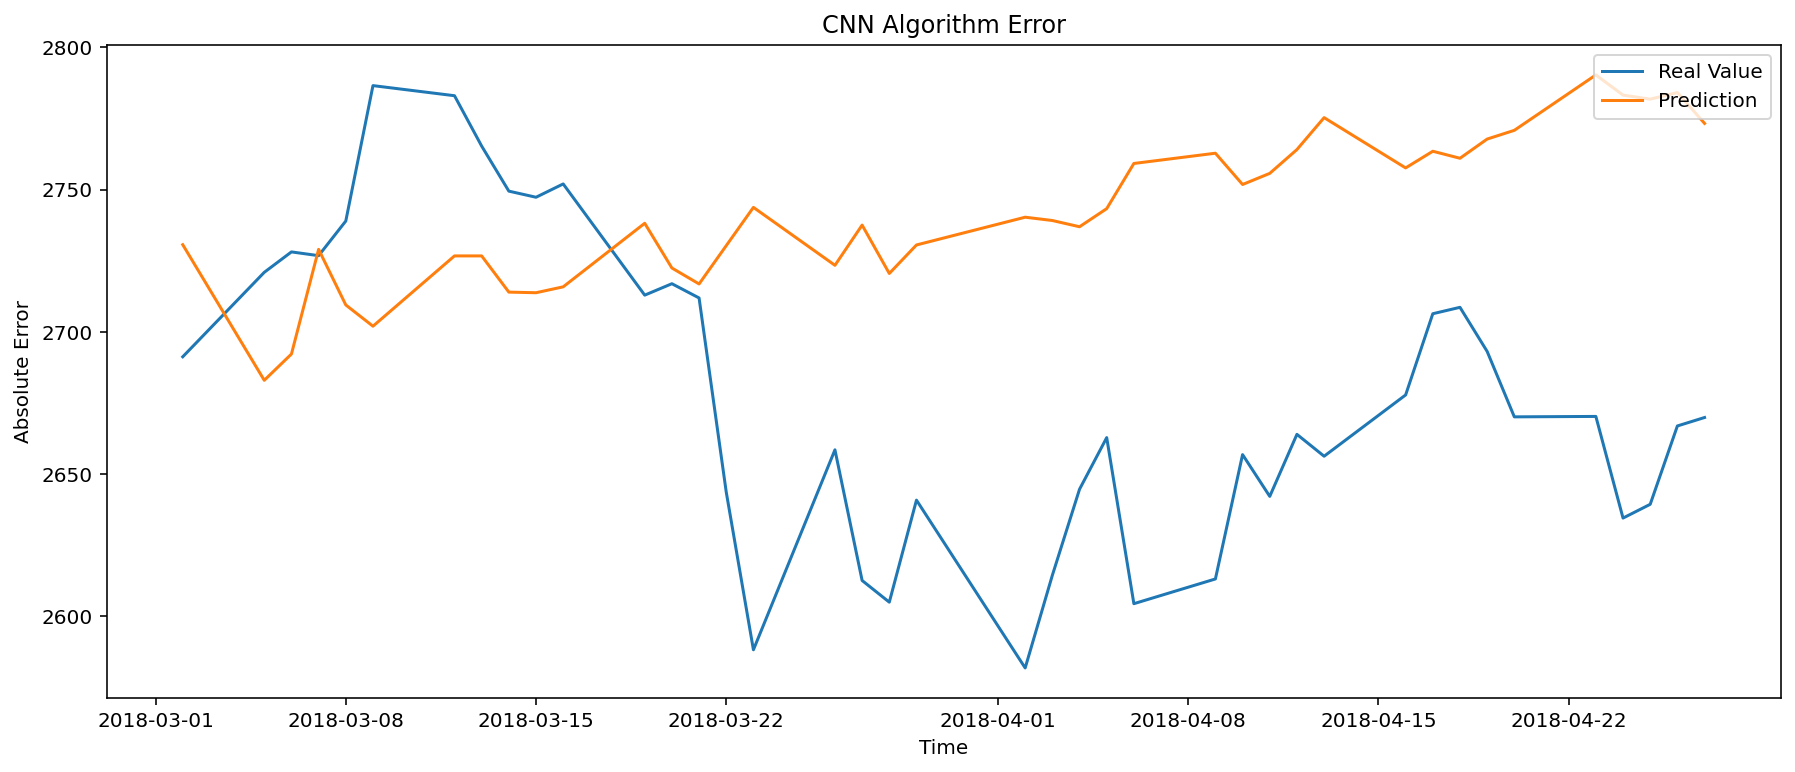

In [18]:
plot_performance(all_forecasts)